#Decision Tree
---
**Aula Prática 05**: Decision Tree para classificação


**Objetivo**: Treinar modelo de classificação


Banco de dados:


**Breast cancer wisconsin dataset**


Disponível via sklearn


> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.
>
> 1) ID number
>
> 2) Diagnosis (0 = malignant, 1 = benign)
>
> 3-32)
>
> Ten real-valued features are computed for each cell nucleus:
>
> a) radius (mean of distances from center to points on the perimeter)
>
> b) texture (standard deviation of gray-scale values)
>
> c) perimeter
>
> d) area
>
> e) smoothness (local variation in radius lengths)
>
> f) compactness (perimeter^2 / area - 1.0)
>
> g) concavity (severity of concave portions of the contour)
>
> h) concave points (number of concave portions of the contour)
>
> i) symmetry
>
> j) fractal dimension ("coastline approximation" - 1)

##Import das principais funções e leitura dos dados


---



In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
data = datasets.load_breast_cancer()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
target = pd.DataFrame(data.target, columns=['Target'])
df = pd.concat([df, target], axis=1)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.describe().T

##Treino de modelo de decision tree
---


Para treinar um modelo de regressão utilizaremos o pacote sklearn.


### Separação do banco entre treino e teste
O primeiro passo para se treinar um modelo é separar o banco entre treino e teste. Para isso utilizaremos a função train_test_split


``` python
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)
```
No exemplo acima X é um dataframe contendo as features do modelo e Y um dataframe com a variável target.


O parâmetro test_size controla o percentual de dados que será utilizado para teste.


O parâmetro random_state controla a aleatoriedade da geração do dado, permitindo que ao reexecutar o código seja gerado os mesmos bancos de treino e teste.


É importante separar o banco entre treino e teste, pois utilizaremos o banco de treino para treinar modelos e o banco de teste para avaliar os modelos.


### Treino do modelo
Agora que já possuímos os dados de treino e teste vamos treinar o nosso de árvore de decisão

``` python
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
```

No código acima o objeto model é do tipo DecisionTreeClassifier, nele iremos fazer o ajuste do nosso modelo, realizar predições e também ficará armazenado a árvore e a importancia das features.


``` python
# Para fazer predições de classes
model.predict(X_test)
# Para fazer predições de probabilidade
model.predict_proba(X_test)
# Para acessar a importancia
model.feature_importances_

```

Alguns parâmetros da Decision Tree:
* criterion: critério para quebra de um nó. Default é gini, mas também pode ser entropy e log_loss
* max_depth: profundidade da árvore. Default é None, isso faz com que as folhas sejam puras (observações menor que min_samples_split)
* min_samples_split: minimo de amostra para separação. Default: 2
* min_samples_leaf: Minimo de amostras em cada folha. Só será considerado quebra com no minimo esse tamanho de amostra. Default: 1.
* random_state: semente para aleatoriedade.


### Avaliação do modelo
Para avaliar o modelo treinado utilizaremos as métricas vistas na aula teórica.

``` python
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay


# Métricas acurácia, precisão, recall, f1-score
print(classification_report(Y_test, Y_predit))


# Matriz de confusão
confusion_matrix(Y_test, Y_predit)


# AUC
roc_auc = roc_auc_score(Y_test, Y_predict)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
```


Também é possível se obter cada uma das métricas do report
``` python
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


recall_score(Y_test, Y_predict, pos_label=1)
```


### Primeiro modelo

---


Exercício:


* Separe o banco entre treino e teste. Use 30% do banco para teste. Faça a quebra com todas as variáveis.


* Treine um modelo.
* Faça as análises de apuração do modelo

In [5]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = data.target

#### Solução

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)

In [ ]:
Y_train.mean()

In [ ]:
X_train.shape

In [7]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(random_state=15)
model_1.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=15)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay

In [9]:
pred_class = model_1.predict(X_test)

In [10]:
pred_class

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [11]:
print(classification_report(Y_test, pred_class))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92        63
           1       0.93      0.98      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(Y_test, pred_class)

In [ ]:
recall_score(Y_test, pred_class, pos_label=0)

In [ ]:
confusion_matrix(Y_test, pred_class)

In [12]:
roc_auc = roc_auc_score(Y_test, pred_class)
roc_auc

0.9272486772486772

In [14]:
pred_proba = model_1.predict_proba(X_test)[:,1]

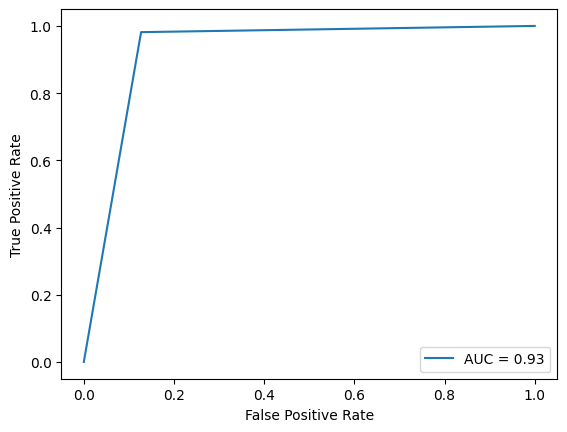

In [15]:
fpr, tpr, thresholds = roc_curve(Y_test, pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Exercício:
* Treine um novo modelo porém com max_depth = 4

* Busca o limiar em que se obtém a melhor acurácia.

* Qual a feature de maior importancia?

Dica:
Para realizar a busca faça:
1. Gere o score de probabilidade
2. Percorra uma lista de valores de limiar e a cada valor calcule a acurácia
3. Obtenha o limiar com maior acurácia


Para acessar P(Y=1) faça predict_proba()[:, 1]

#### Solução

In [30]:
model = DecisionTreeClassifier(max_depth=2, random_state=15)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=15)

In [31]:
predict_proba = model.predict_proba(X_test)

In [32]:
predict_proba

array([[0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [1.        , 0.        ],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [1.        , 0.        ],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.6       , 0.4       ],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.8125    , 0.1875    ],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [0.02834008, 0.97165992],
       [1.        , 0.        ],
       [0.

In [33]:
from sklearn.metrics import accuracy_score

predict_proba = model.predict_proba(X_test)[:, 1]
acc_atual = 0
thr_otimo = 0
for thr in np.arange(0, 1, .1):
  acc = accuracy_score(Y_test, predict_proba>=thr)
  if acc >= acc_atual:
    thr_otimo = thr
    acc_atual = acc

In [34]:
acc_atual

0.9239766081871345

In [35]:
thr_otimo

0.9

In [36]:
import plotly.express as px

acc_lista = []
for thr in np.arange(0, 1, .1):
  acc_lista.append(accuracy_score(Y_test, predict_proba>=thr))

px.line(x=np.arange(0, 1, .1), y=acc_lista)

In [23]:
predict_proba

array([0.99141631, 0.99141631, 0.        , 0.99141631, 0.99141631,
       0.        , 0.99141631, 0.99141631, 0.99141631, 0.99141631,
       0.        , 0.        , 0.99141631, 0.99141631, 0.99141631,
       0.99141631, 0.99141631, 0.99141631, 0.99141631, 0.99141631,
       0.99141631, 1.        , 0.99141631, 0.99141631, 1.        ,
       0.        , 0.99141631, 0.        , 0.99141631, 0.        ,
       0.99141631, 0.99141631, 0.99141631, 0.99141631, 0.99141631,
       0.99141631, 0.99141631, 0.99141631, 0.99141631, 0.99141631,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.99141631, 0.99141631, 0.99141631, 0.        ,
       0.        , 0.99141631, 0.99141631, 0.99141631, 0.99141631,
       0.99141631, 0.99141631, 0.99141631, 0.        , 0.99141631,
       1.        , 0.        , 0.        , 0.99141631, 0.        ,
       0.99141631, 0.        , 0.        , 0.99141631, 0.        ,
       0.        , 0.99141631, 0.99141631, 0.99141631, 0.99141

In [24]:
print(classification_report(Y_test, predict_proba>=.1))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        63
           1       0.93      0.99      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



In [25]:
print(classification_report(Y_test, predict_proba>=.9))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        63
           1       0.93      0.99      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



**Visualização da feature importance**

In [26]:
df = pd.DataFrame(model.feature_importances_.T, index=data.feature_names, columns=['Importancia'])
df.sort_values('Importancia', ascending=False)

,Importancia
worst area,0.756350
worst concave points,0.113013
mean texture,0.060416
worst texture,0.026716
mean concavity,0.023383
area error,0.010727
concavity error,0.009395
worst smoothness,0.000000
concave points error,0.000000
worst perimeter,0.000000


In [27]:
px.bar(df.sort_values('Importancia'))

In [37]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(
model,
out_file=dot_data,
feature_names=X.columns,
class_names=["malignant", "benign"],
filled=True,
)
g = pydotplus.graph_from_dot_data(
dot_data.getvalue()
)

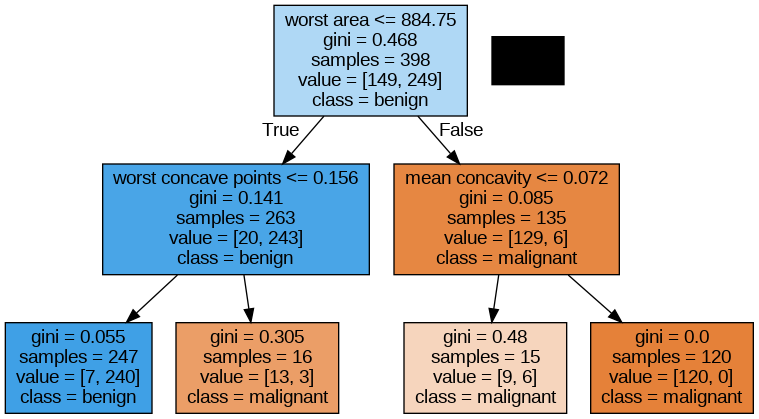

In [38]:
from IPython.display import Image
Image(g.create_png())

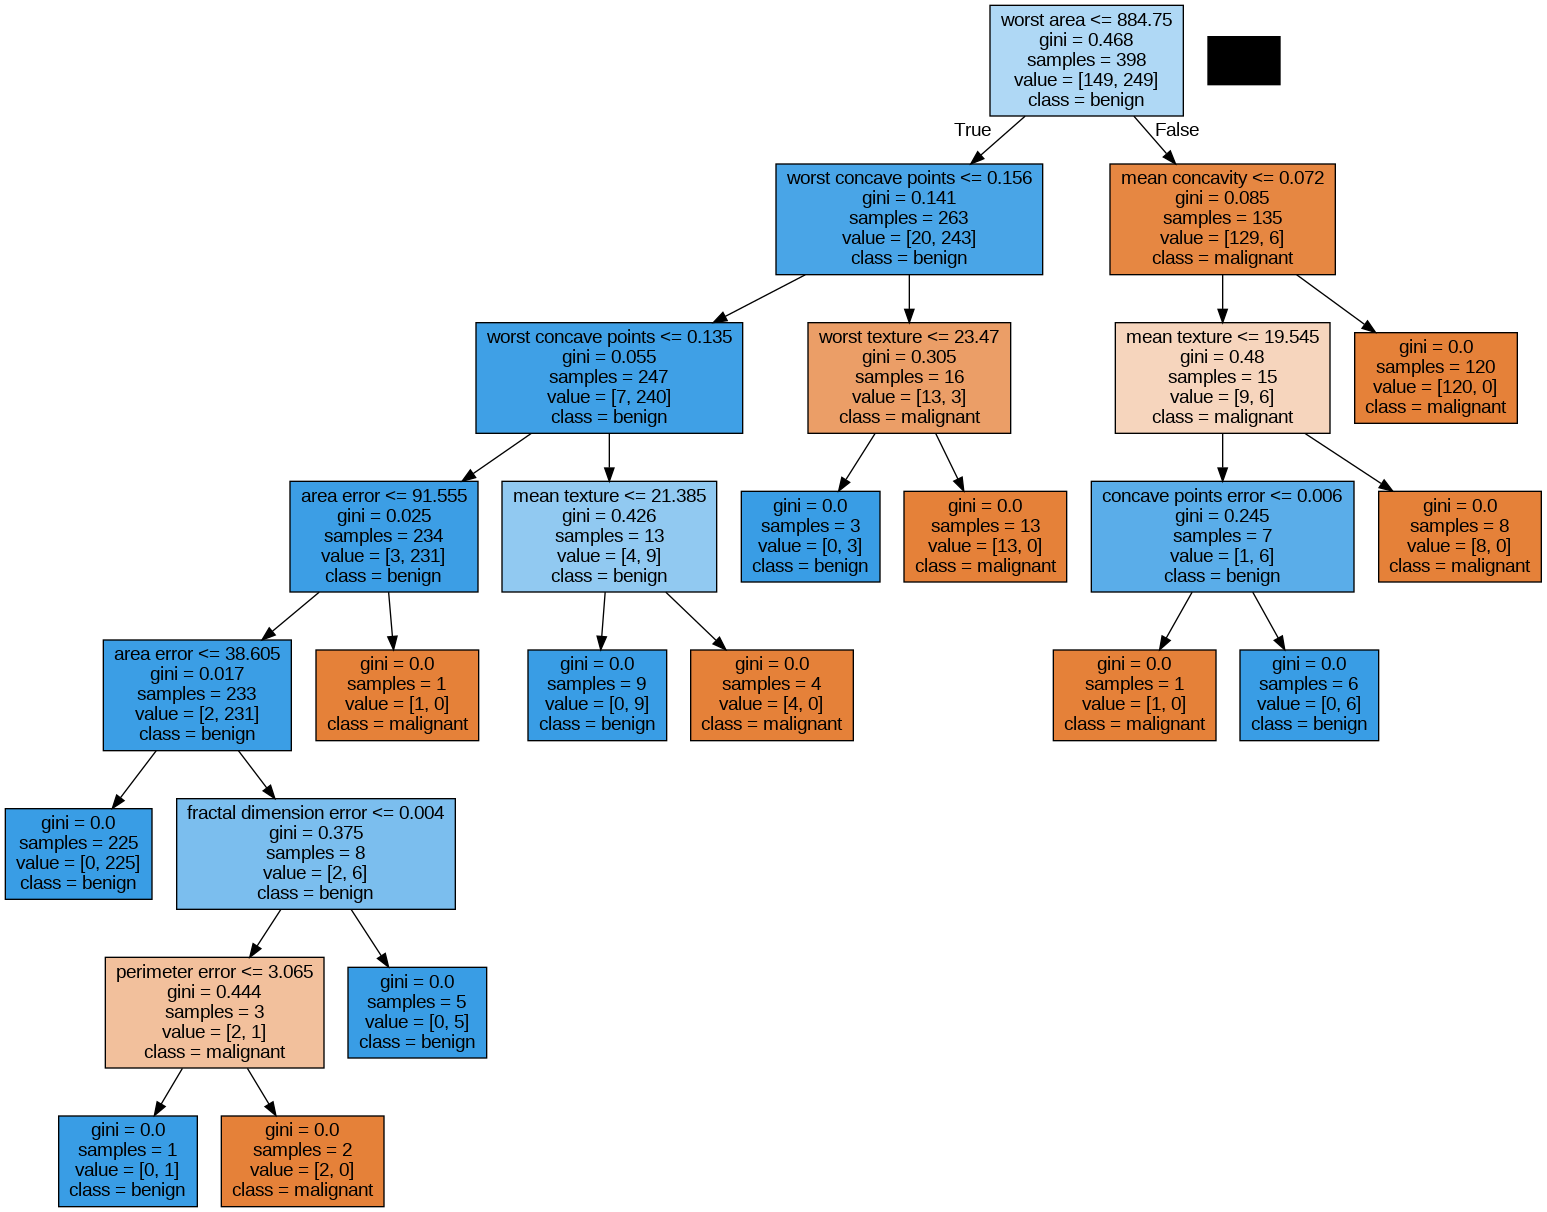

In [39]:
dot_data = StringIO()
export_graphviz(
model_1,
out_file=dot_data,
feature_names=X.columns,
class_names=["malignant", "benign"],
filled=True,
)
g = pydotplus.graph_from_dot_data(
dot_data.getvalue()
)
Image(g.create_png())